In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [50]:
#desired graphs

#1. RIE Power vs DC Bias (RIE Mode)
#2. RIE Power vs DC Bias (ICP-RIE Mode)
#3. ICP Power vs DC Bias (isotropic etching)


In [51]:
#data compilation - DC Bias 

#create a pandas dataframe for each data set, not from a csv, create it empty

#RIE Mode

RIE_mode = pd.DataFrame(columns = ['RIE Power','DC Bias','r','e','s'])

RIE_mode.loc[0] = [100.0,416.0,5.5,6.02,1.4]
RIE_mode.loc[1] = [70.0,317.0,5.5,6.25,1.3]
RIE_mode.loc[2] = [70.0,215.0,5.5,6.27,1.14]
RIE_mode.loc[3] = [30.0,126.0,5.5,6.22,1.0]


#ICP-RIE Mode

ICP_RIE_mode = pd.DataFrame(columns = ['RIE Power','DC Bias','r','e','s'])

ICP_RIE_mode.loc[0] = [20.0,136.0,5.5,7.14,7.01]
ICP_RIE_mode.loc[1] = [30.0,220.0,5.5,8.26,4.21]
ICP_RIE_mode.loc[2] = [40.0,256.0,5.5,7.1,4.1]
ICP_RIE_mode.loc[3] = [10.0,75.0,5.5,12.0,7.0]

#Isotropic Etching

Isotropic = pd.DataFrame(columns = ['ICP Power','DC Bias','r','e','s'])

Isotropic.loc[0] = [1000.0,0.0,5.5,9.1,11.5]
Isotropic.loc[1] = [700.0,0.0,5.5,7.7,5.29]
Isotropic.loc[2] = [500.0,0.0,5.5,8.12,4.9]
Isotropic.loc[3] = [300.0,0.0,5.5,7.43,3.68]

t_1 = 120.0
t_2 = 300.0

# er_si = s/t_1
#add column

RIE_mode['er_si'] = RIE_mode['s']/t_1

#er_re = [r-(e-s)]/t_2

RIE_mode['er_re'] = (RIE_mode['r']-(RIE_mode['e']-RIE_mode['s']))/t_2



#add for the other data sets also

ICP_RIE_mode['er_si'] = ICP_RIE_mode['s']/t_1
ICP_RIE_mode['er_re'] = (ICP_RIE_mode['r']-(ICP_RIE_mode['e']-ICP_RIE_mode['s']))/t_2


Isotropic['er_si'] = Isotropic['s']/t_1
Isotropic['er_re'] = (Isotropic['r']-(Isotropic['e']-Isotropic['s']))/t_2


#selectivity = er_si/er_re

RIE_mode['selectivity'] = RIE_mode['er_si']/RIE_mode['er_re']
ICP_RIE_mode['selectivity'] = ICP_RIE_mode['er_si']/ICP_RIE_mode['er_re']
Isotropic['selectivity'] = Isotropic['er_si']/Isotropic['er_re']




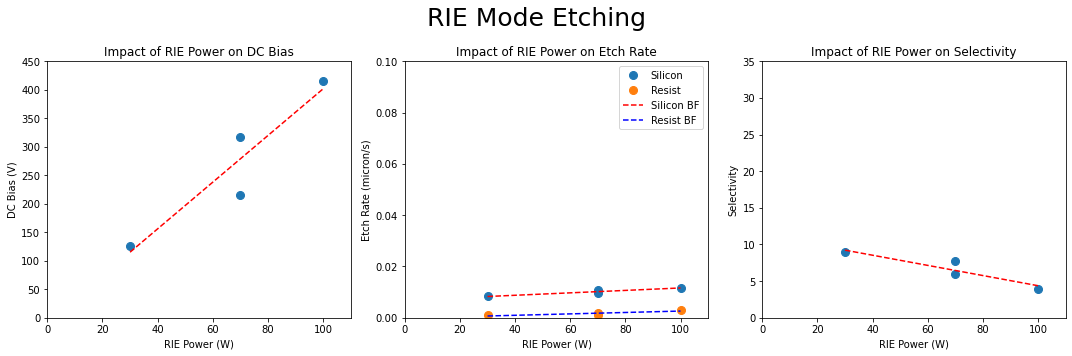

In [52]:
#first plot is for RIE Mode etching
#three plots, one for DC bias, one with both etch rates, and one with selectivity (3 subplots)



plt.rcParams['lines.markersize'] = 8
ax, fig = plt.subplots(1,3,figsize=(15,5))
ax.suptitle('RIE Mode Etching',fontsize=25)
#first plot is RIE Power vs DC Bias
fig[0].plot(RIE_mode['RIE Power'],RIE_mode['DC Bias'],'o')
fig[0].set_xlabel('RIE Power (W)')
fig[0].set_ylabel('DC Bias (V)')
fig[0].set_title('Impact of RIE Power on DC Bias')
#set x and y scales to be the same for all plots
fig[0].set_xlim(0,110)
fig[0].set_ylim(0,450)
#second plot is RIE Power vs etch rates
fig[1].plot(RIE_mode['RIE Power'],RIE_mode['er_si'],'o',label='Silicon')
fig[1].plot(RIE_mode['RIE Power'],RIE_mode['er_re'],'o',label='Resist')
fig[1].set_xlabel('RIE Power (W)')
fig[1].set_ylabel('Etch Rate (micron/s)')
fig[1].set_title('Impact of RIE Power on Etch Rate')
fig[1].legend()
fig[1].set_xlim(0,110)
fig[1].set_ylim(0,.1)
#third plot is RIE Power vs selectivity
fig[2].plot(RIE_mode['RIE Power'],RIE_mode['selectivity'],'o')
fig[2].set_xlabel('RIE Power (W)')
fig[2].set_ylabel('Selectivity')
fig[2].set_title('Impact of RIE Power on Selectivity')
fig[2].set_xlim(0,110)
fig[2].set_ylim(0,35)


fig[0].plot(np.unique(RIE_mode['RIE Power']), np.poly1d(np.polyfit(RIE_mode['RIE Power'], RIE_mode['DC Bias'], 1))(np.unique(RIE_mode['RIE Power'])),color='red',linestyle='dashed')
fig[1].plot(np.unique(RIE_mode['RIE Power']), np.poly1d(np.polyfit(RIE_mode['RIE Power'], RIE_mode['er_si'], 1))(np.unique(RIE_mode['RIE Power'])),color='red',label='Silicon BF',linestyle='dashed')
fig[1].plot(np.unique(RIE_mode['RIE Power']), np.poly1d(np.polyfit(RIE_mode['RIE Power'], RIE_mode['er_re'], 1))(np.unique(RIE_mode['RIE Power'])),color='blue',label='Resist BF',linestyle='dashed')

#store the slope and intercept of the best fit line for each plot
R_fig0_m = np.polyfit(RIE_mode['RIE Power'], RIE_mode['DC Bias'], 1)[0]
R_fig0_b = np.polyfit(RIE_mode['RIE Power'], RIE_mode['DC Bias'], 1)[1]
R_fig1_mSi = np.polyfit(RIE_mode['RIE Power'], RIE_mode['er_si'], 1)[0]
R_fig1_bSi = np.polyfit(RIE_mode['RIE Power'], RIE_mode['er_si'], 1)[1]
R_fig1_mRe = np.polyfit(RIE_mode['RIE Power'], RIE_mode['er_re'], 1)[0]
R_fig1_bRe = np.polyfit(RIE_mode['RIE Power'], RIE_mode['er_re'], 1)[1]
R_fig2_m = np.polyfit(RIE_mode['RIE Power'], RIE_mode['selectivity'], 1)[0]
R_fig2_b = np.polyfit(RIE_mode['RIE Power'], RIE_mode['selectivity'], 1)[1]



fig[1].legend()
fig[2].plot(np.unique(RIE_mode['RIE Power']), np.poly1d(np.polyfit(RIE_mode['RIE Power'], RIE_mode['selectivity'], 1))(np.unique(RIE_mode['RIE Power'])),color='red',linestyle='dashed')
plt.tight_layout()
plt.savefig('Problems/Problem1.png',dpi=300,bbox_inches='tight',facecolor='white')
plt.show()








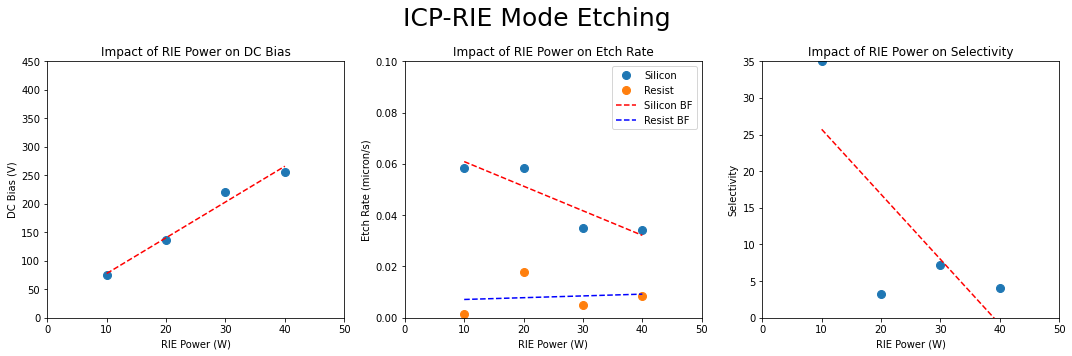

In [53]:
#Problem 2 is same thing but for ICP-RIE Mode


plt.rcParams['lines.markersize'] = 8
ax, fig = plt.subplots(1,3,figsize=(15,5))
ax.suptitle('ICP-RIE Mode Etching',fontsize=25)
#first plot is RIE Power vs DC Bias
fig[0].plot(ICP_RIE_mode['RIE Power'],ICP_RIE_mode['DC Bias'],'o')
fig[0].set_xlabel('RIE Power (W)')
fig[0].set_ylabel('DC Bias (V)')
fig[0].set_title('Impact of RIE Power on DC Bias')
#set x and y scales to be the same for all plots
fig[0].set_xlim(0,50)
fig[0].set_ylim(0,450)
#second plot is RIE Power vs etch rates
fig[1].plot(ICP_RIE_mode['RIE Power'],ICP_RIE_mode['er_si'],'o',label='Silicon')
fig[1].plot(ICP_RIE_mode['RIE Power'],ICP_RIE_mode['er_re'],'o',label='Resist')
fig[1].set_xlabel('RIE Power (W)')
fig[1].set_ylabel('Etch Rate (micron/s)')
fig[1].set_title('Impact of RIE Power on Etch Rate')
fig[1].legend()
fig[1].set_xlim(0,50)
fig[1].set_ylim(0,.1)
#third plot is RIE Power vs selectivity
fig[2].plot(ICP_RIE_mode['RIE Power'],ICP_RIE_mode['selectivity'],'o')
fig[2].set_xlabel('RIE Power (W)')
fig[2].set_ylabel('Selectivity')
fig[2].set_title('Impact of RIE Power on Selectivity')
fig[2].set_xlim(0,50)
fig[2].set_ylim(0,35)
fig[0].plot(np.unique(ICP_RIE_mode['RIE Power']), np.poly1d(np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['DC Bias'], 1))(np.unique(ICP_RIE_mode['RIE Power'])),color='red',linestyle='dashed')
fig[1].plot(np.unique(ICP_RIE_mode['RIE Power']), np.poly1d(np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['er_si'], 1))(np.unique(ICP_RIE_mode['RIE Power'])),color='red',label='Silicon BF',linestyle='dashed')
fig[1].plot(np.unique(ICP_RIE_mode['RIE Power']), np.poly1d(np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['er_re'], 1))(np.unique(ICP_RIE_mode['RIE Power'])),color='blue',label='Resist BF',linestyle='dashed')
fig[2].plot(np.unique(ICP_RIE_mode['RIE Power']), np.poly1d(np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['selectivity'], 1))(np.unique(ICP_RIE_mode['RIE Power'])),color='red',linestyle='dashed')

#store the slope and intercept of the best fit line for each plot

IR_fig0_m = np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['DC Bias'], 1)[0]
IR_fig0_b = np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['DC Bias'], 1)[1]
IR_fig1_mSi = np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['er_si'], 1)[0]
IR_fig1_bSi = np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['er_si'], 1)[1]
IR_fig1_mRe = np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['er_re'], 1)[0]
IR_fig1_bRe = np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['er_re'], 1)[1]
IR_fig2_m = np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['selectivity'], 1)[0]
IR_fig2_b = np.polyfit(ICP_RIE_mode['RIE Power'], ICP_RIE_mode['selectivity'], 1)[1]

fig[1].legend()
plt.tight_layout()
plt.savefig('Problems/Problem2.png',dpi=300,bbox_inches='tight',facecolor='white')
plt.show()




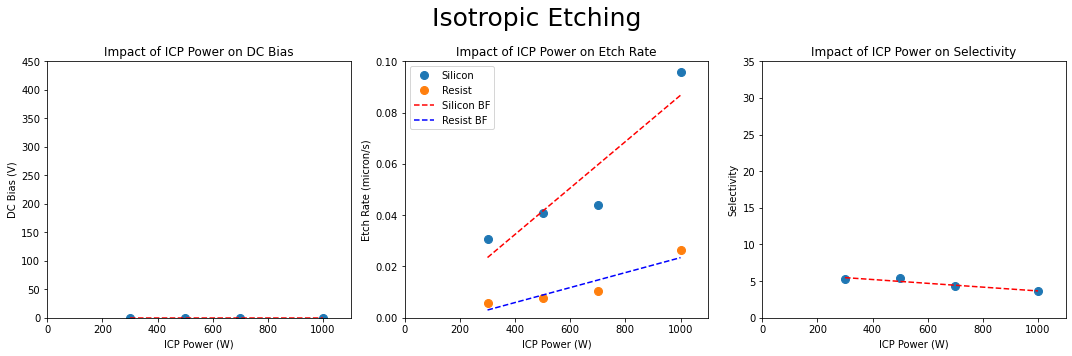

In [54]:
#Problem 3 is same thing but for Isotropic Etching

plt.rcParams['lines.markersize'] = 8
ax, fig = plt.subplots(1,3,figsize=(15,5))
ax.suptitle('Isotropic Etching',fontsize=25)
#first plot is ICP Power vs DC Bias
fig[0].plot(Isotropic['ICP Power'],Isotropic['DC Bias'],'o')
fig[0].set_xlabel('ICP Power (W)')
fig[0].set_ylabel('DC Bias (V)')
fig[0].set_title('Impact of ICP Power on DC Bias')
#set x and y scales to be the same for all plots
fig[0].set_xlim(0,1100)
fig[0].set_ylim(0,450)
#second plot is ICP Power vs etch rates
fig[1].plot(Isotropic['ICP Power'],Isotropic['er_si'],'o',label='Silicon')
fig[1].plot(Isotropic['ICP Power'],Isotropic['er_re'],'o',label='Resist')
fig[1].set_xlabel('ICP Power (W)')
fig[1].set_ylabel('Etch Rate (micron/s)')
fig[1].set_title('Impact of ICP Power on Etch Rate')
fig[1].legend()
fig[1].set_xlim(0,1100)
fig[1].set_ylim(0,.1)
#third plot is ICP Power vs selectivity
fig[2].plot(Isotropic['ICP Power'],Isotropic['selectivity'],'o')
fig[2].set_xlabel('ICP Power (W)')
fig[2].set_ylabel('Selectivity')
fig[2].set_title('Impact of ICP Power on Selectivity')
fig[2].set_xlim(0,1100)
fig[2].set_ylim(0,35)

fig[0].plot(np.unique(Isotropic['ICP Power']), np.poly1d(np.polyfit(Isotropic['ICP Power'], Isotropic['DC Bias'], 1))(np.unique(Isotropic['ICP Power'])),color='red',linestyle='dashed')
fig[1].plot(np.unique(Isotropic['ICP Power']), np.poly1d(np.polyfit(Isotropic['ICP Power'], Isotropic['er_si'], 1))(np.unique(Isotropic['ICP Power'])),color='red',label='Silicon BF',linestyle='dashed')
fig[1].plot(np.unique(Isotropic['ICP Power']), np.poly1d(np.polyfit(Isotropic['ICP Power'], Isotropic['er_re'], 1))(np.unique(Isotropic['ICP Power'])),color='blue',label='Resist BF',linestyle='dashed')
fig[2].plot(np.unique(Isotropic['ICP Power']), np.poly1d(np.polyfit(Isotropic['ICP Power'], Isotropic['selectivity'], 1))(np.unique(Isotropic['ICP Power'])),color='red',linestyle='dashed')

#store the slope and intercept of the best fit line for each plot

I_fig0_m = np.polyfit(Isotropic['ICP Power'], Isotropic['DC Bias'], 1)[0]
I_fig0_b = np.polyfit(Isotropic['ICP Power'], Isotropic['DC Bias'], 1)[1]
I_fig1_mSi = np.polyfit(Isotropic['ICP Power'], Isotropic['er_si'], 1)[0]
I_fig1_bSi = np.polyfit(Isotropic['ICP Power'], Isotropic['er_si'], 1)[1]
I_fig1_mRe = np.polyfit(Isotropic['ICP Power'], Isotropic['er_re'], 1)[0]
I_fig1_bRe = np.polyfit(Isotropic['ICP Power'], Isotropic['er_re'], 1)[1]
I_fig2_m = np.polyfit(Isotropic['ICP Power'], Isotropic['selectivity'], 1)[0]
I_fig2_b = np.polyfit(Isotropic['ICP Power'], Isotropic['selectivity'], 1)[1]


fig[1].legend()
plt.tight_layout()
plt.savefig('Problems/Problem3.png',dpi=300,bbox_inches='tight',facecolor='white')
plt.show()



In [55]:
#comparisons of the slopes and intercepts of the best fit lines

#make a dataframe for the slopes and intercepts

#DC Bias slope and intercept table

DC_rel = pd.DataFrame(columns = ['Mode', 'm', 'b'])
DC_rel.loc[0] = ['RIE',R_fig0_m,R_fig0_b]
DC_rel.loc[1] = ['ICP-RIE',IR_fig0_m,IR_fig0_b]
DC_rel.loc[2] = ['Isotropic',I_fig0_m,I_fig0_b]

#etch rate slope and intercept table

erSi_rel = pd.DataFrame(columns = ['Mode', 'm', 'b'])
erSi_rel.loc[0] = ['RIE',R_fig1_mSi,R_fig1_bSi]
erSi_rel.loc[1] = ['ICP-RIE',IR_fig1_mSi,IR_fig1_bSi]
erSi_rel.loc[2] = ['Isotropic',I_fig1_mSi,I_fig1_bSi]

erRe_rel = pd.DataFrame(columns = ['Mode', 'm', 'b'])
erRe_rel.loc[0] = ['RIE',R_fig1_mRe,R_fig1_bRe]
erRe_rel.loc[1] = ['ICP-RIE',IR_fig1_mRe,IR_fig1_bRe]
erRe_rel.loc[2] = ['Isotropic',I_fig1_mRe,I_fig1_bRe]

#selectivity slope and intercept table

sel_rel = pd.DataFrame(columns = ['Mode', 'm', 'b'])
sel_rel.loc[0] = ['RIE',R_fig2_m,R_fig2_b]
sel_rel.loc[1] = ['ICP-RIE',IR_fig2_m,IR_fig2_b]
sel_rel.loc[2] = ['Isotropic',I_fig2_m,I_fig2_b]


#print tables

print('DC Bias')
print(DC_rel)

print(' ')

print('Silicon Etch Rate')
print(erSi_rel)

print(' ')


print('Resist Etch Rate')
print(erRe_rel)

print(' ')

print('Selectivity')
print(sel_rel)

print(' ')



DC Bias
        Mode         m          b
0        RIE  4.090909  -7.636364
1    ICP-RIE  6.270000  15.000000
2  Isotropic  0.000000   0.000000
 
Silicon Etch Rate
        Mode         m         b
0        RIE  0.000047  0.006879
1    ICP-RIE -0.000958  0.070458
2  Isotropic  0.000090 -0.003625
 
Resist Etch Rate
        Mode         m         b
0        RIE  0.000027 -0.000121
1    ICP-RIE  0.000069  0.006450
2  Isotropic  0.000029 -0.005712
 
Selectivity
        Mode         m          b
0        RIE -0.069305  11.307516
1    ICP-RIE -0.887049  34.581750
2  Isotropic -0.002596   6.259856
 


In [56]:
#give me a table of the df

RIE_mode.to_csv('RIE_mode.csv')
ICP_RIE_mode.to_csv('ICP_RIE_mode.csv')
Isotropic.to_csv('Isotropic.csv')